# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing drug dataset
df_drug = pd.read_csv("D:/CC software/drug200.csv")
print(f'no. of rows & columns: {df_drug.shape}')
df_drug.head()

no. of rows & columns: (200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
#viewing data type and checking null in dataset.
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### According to above information:

##### It seems that there is no missing data, which will be checked further.
##### There are 4 categorical feature including Sex, BP, Cholesterol, Drug_Type
##### There are two numerical feature including Na_to_k, Age

In [4]:
# checking missing values:
df_drug.isnull().sum().to_frame('is null').T

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
is null,0,0,0,0,0,0


###### It seems that there is no missing data, but there may be invalid values, so we will check these values below:

In [5]:
# checking invalid values:
for col in df_drug:
    print(f"{col}: {df_drug[col].unique()}\n")

Age: [23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]

Sex: ['F' 'M']

BP: ['HIGH' 'LOW' 'NORMAL']

Cholesterol: ['HIGH' 'NORMAL']

Na_to_K: [25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 38.247 25.395 35.639 16.725
 11.871 12.854 13.127  8

In [6]:
# checking duplicate data
print(f"Number of duplicated values: {df_drug.duplicated().sum()}")

Number of duplicated values: 0


### Initial Dataset Exploration
##### Categorical Variables

In [7]:
df_drug.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

##### It can be seen that from results above, DrugY has more amount than other types of drugs and it is an imbalanced data

In [8]:
df_drug.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

##### The distribution of patient gender is balanced.

In [9]:
df_drug.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

##### The distribution of blood pressure level is balanced.

In [10]:
df_drug.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

##### The distribution of cholesterol level is balanced.

In [11]:
df_drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


##### Once you calculate skewness, you can categorize the extent of the skew:

##### (-0.5, 0.5) — low or approximately symmetric.
##### (-1, -0.5) or (0.5, 1) — moderately skewed.
##### Beyond -1 and 1 — Highly skewed.

In [12]:
skewAge = df_drug.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


##### The distribution of 'Age' column is symmetric, since the skewness value between -0.5 and 0.5

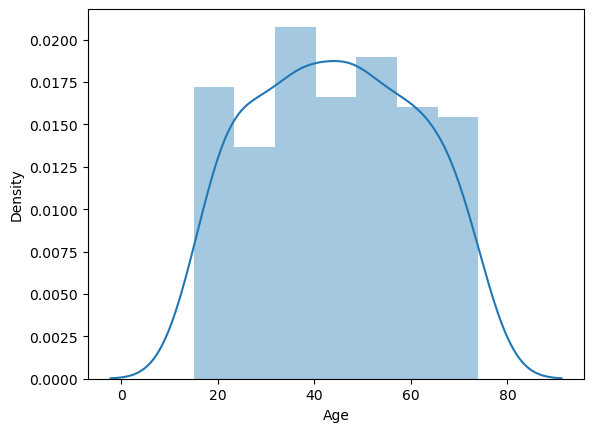

In [13]:
sns.distplot(df_drug['Age']);

In [14]:
skewNatoK = df_drug.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


##### The distribution of 'Na_to_K' column is moderately skewed (right), (0.5 ,1).

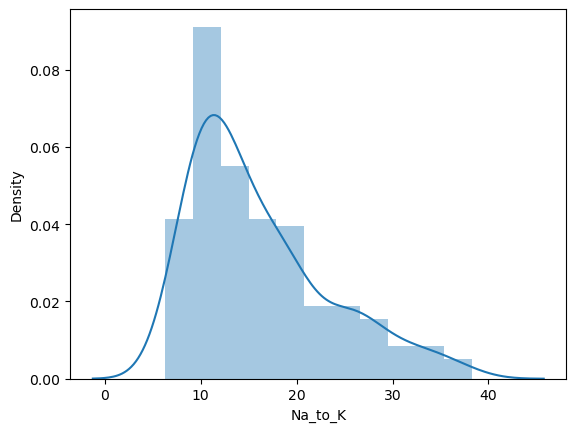

In [15]:
sns.distplot(df_drug['Na_to_K']);

## EDA

In [16]:
# finding the relation between features
# Correlation matrix
corr_matrix = df_drug.corr()
corr_matrix

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


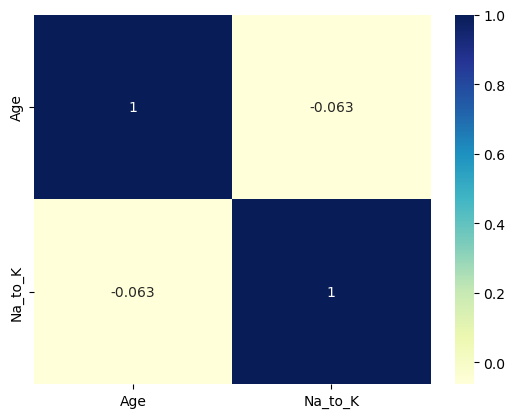

In [17]:
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

###### weak negative relationship between Age and Na_to_K. 
###### In other words, as Age increases, Na_to_K tends to decrease slightly

In [18]:
# Define the font dictionary
font = {'family': 'sans-serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

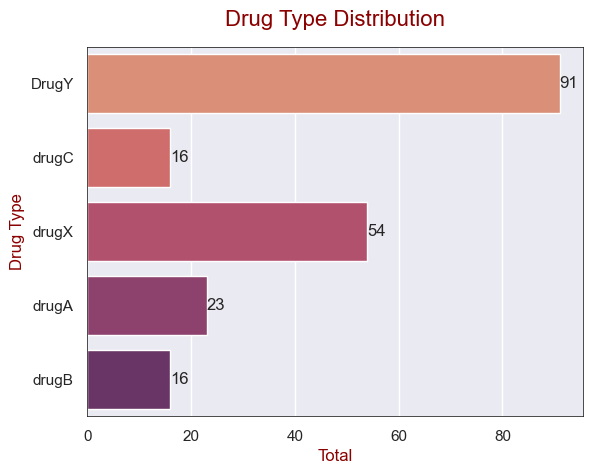

In [19]:
# Drug Type Distribution
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Drug", data=df_drug, palette="flare")

for container in ax.containers:
    ax.bar_label(container)

# Adding a border around the plot
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set the border color
    spine.set_linewidth(0.5)        # Set the border width

plt.title('Drug Type Distribution', fontdict=font, pad=15)
plt.ylabel('Drug Type', color="darkred")
plt.xlabel('Total', color="darkred")
plt.show()


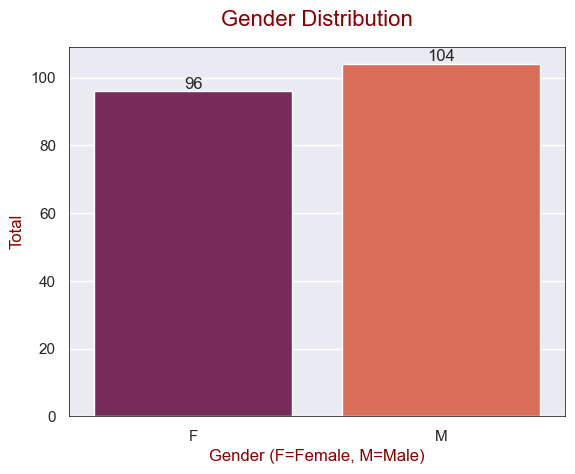

In [20]:
# Gender Distribution
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Sex", data=df_drug, palette="rocket")

for container in ax.containers:
    ax.bar_label(container)
    
for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(0.5)        

plt.title('Gender Distribution', fontdict=font, pad=15)
plt.xlabel('Gender (F=Female, M=Male)', color="darkred")
plt.ylabel('Total', color="darkred")
plt.show()


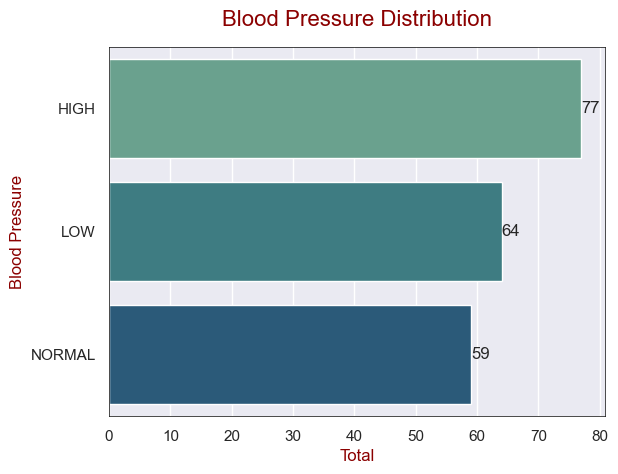

In [21]:
#Blood Pressure Distribution
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="BP", data=df_drug, palette="crest")

for container in ax.containers:
    ax.bar_label(container)
    
for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(0.5)     

plt.title('Blood Pressure Distribution', fontdict=font, pad=15)
plt.xlabel('Total', color="darkred")
plt.ylabel('Blood Pressure', color="darkred")
plt.show()

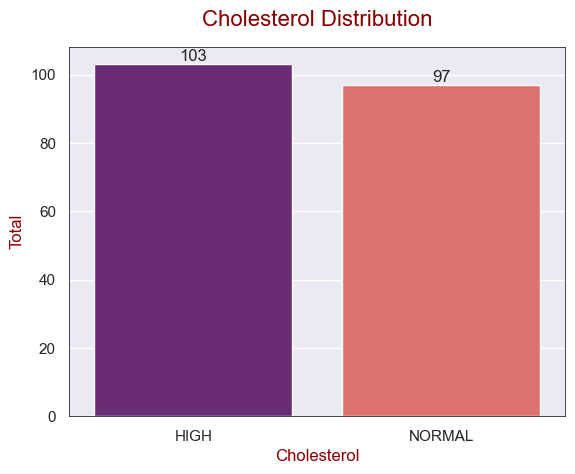

In [22]:
# Cholesterol Distribution 
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Cholesterol", data=df_drug, palette="magma")

for container in ax.containers:
    ax.bar_label(container)
    
for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(0.5)     


plt.title('Cholesterol Distribution', fontdict=font, pad=15)
plt.xlabel('Cholesterol', color="darkred")
plt.ylabel('Total', color="darkred")
plt.show()

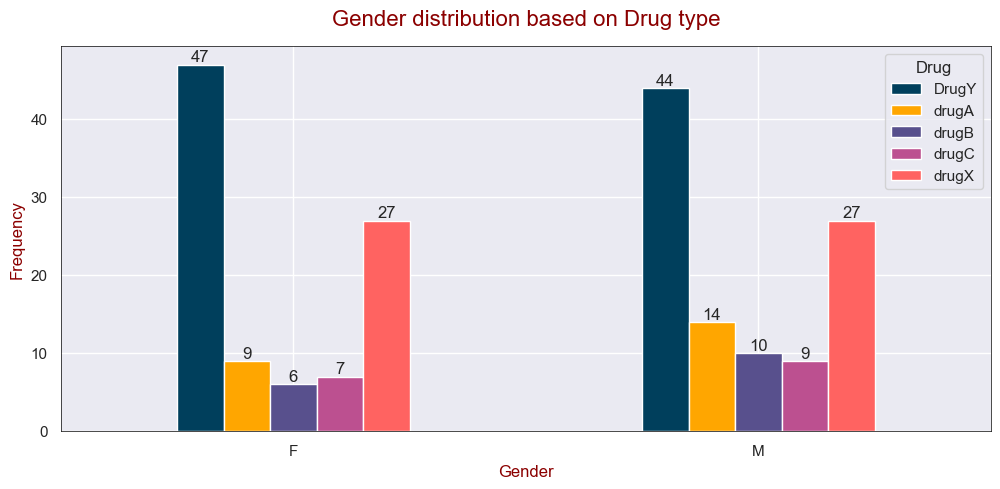

In [23]:
# Gender Distribution based on Drug Type
ax = pd.crosstab(df_drug.Sex,df_drug.Drug).plot(kind="bar",figsize=(12, 5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])

for container in ax.containers:
    ax.bar_label(container)
    
for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(0.5)     

plt.title('Gender distribution based on Drug type', fontdict=font, pad=15)
plt.xlabel('Gender', color="darkred")
plt.xticks(rotation=0)
plt.ylabel('Frequency', color="darkred")
plt.show()

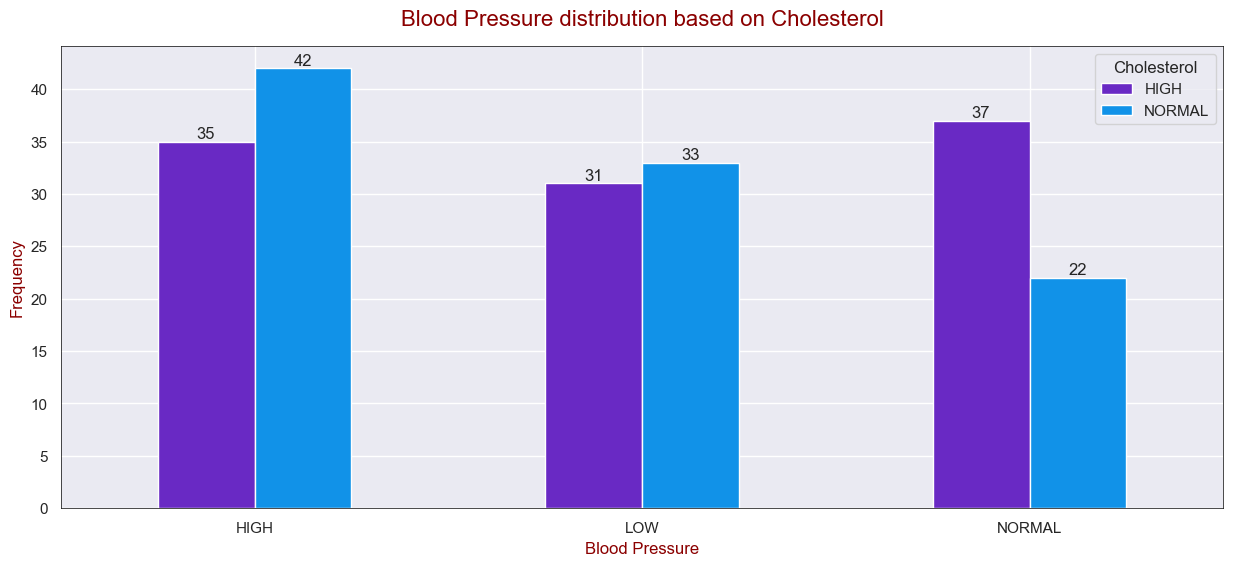

In [24]:
# Blood Pressure Distribution based on Cholesetrol
ax = pd.crosstab(df_drug.BP,df_drug.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])

for container in ax.containers:
    ax.bar_label(container)
    
for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(0.5)  

plt.title('Blood Pressure distribution based on Cholesterol', fontdict=font, pad=15)
plt.xlabel('Blood Pressure' , color="darkred")
plt.xticks(rotation=0)
plt.ylabel('Frequency' , color="darkred")
plt.show()

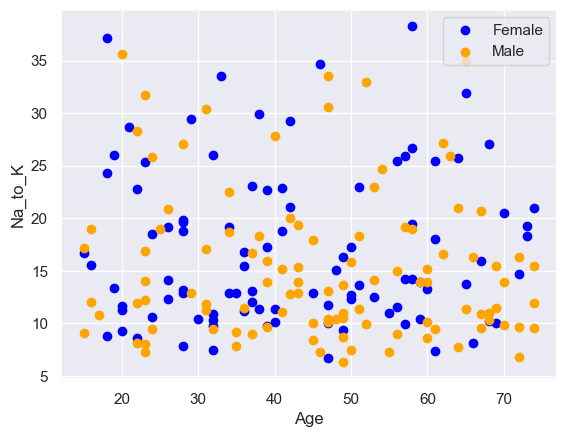

In [25]:
# Sodium to Potassium Distribution based on Gender and Age 
plt.scatter(x=df_drug.Age[df_drug.Sex=='F'], 
            y=df_drug.Na_to_K[(df_drug.Sex=='F')], c="Blue")
plt.scatter(x=df_drug.Age[df_drug.Sex=='M'], 
            y=df_drug.Na_to_K[(df_drug.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

##### Binning is the process of converting continuous data into discrete categories or bins 
##### (Simplification, improves model accuracy, normalization, handling outliers)
##### The age will be divided into 7 age categories:
##### Below 20 y.o., 20 - 29 y.o., 30 - 39 y.o., 40 - 49 y.o., 50 - 59 y.o., 60 - 69 y.o., Above 70.

In [26]:
# Define the bin edges for categorizing ages
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]

# Define the labels for each age category
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']

# Create a new column 'Age_binned' in the DataFrame 'df_drug'
# This column categorizes the 'Age' column into the defined bins with the corresponding labels
df_drug['Age_binned'] = pd.cut(df_drug['Age'], bins=bin_age, labels=category_age)

# Drop the original 'Age' column from the DataFrame as it's now represented by 'Age_binned'
df_drug = df_drug.drop(['Age'], axis=1)


##### The chemical ratio will be divided into 4 categories:

##### Below 10, 10 - 20, 20 - 30, Above 30.

In [27]:
# Define the bin edges for categorizing Na_to_K values
bin_NatoK = [0, 9, 19, 29, 50]

# Define the labels for each Na_to_K category
category_NatoK = ['<10', '10-20', '20-30', '>30']

# Create a new column 'Na_to_K_binned' in the DataFrame 'df_drug'
# This column categorizes the 'Na_to_K' column into the defined bins with the corresponding labels
df_drug['Na_to_K_binned'] = pd.cut(df_drug['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)

# Drop the original 'Na_to_K' column from the DataFrame as it's now represented by 'Na_to_K_binned'
df_drug = df_drug.drop(['Na_to_K'], axis=1)

In [28]:
print(df_drug)

    Sex      BP Cholesterol   Drug Age_binned Na_to_K_binned
0     F    HIGH        HIGH  DrugY        20s          20-30
1     M     LOW        HIGH  drugC        40s          10-20
2     M     LOW        HIGH  drugC        40s          10-20
3     F  NORMAL        HIGH  drugX        20s            <10
4     F     LOW        HIGH  DrugY        60s          10-20
..   ..     ...         ...    ...        ...            ...
195   F     LOW        HIGH  drugC        50s          10-20
196   M     LOW        HIGH  drugC       <20s          10-20
197   M  NORMAL        HIGH  drugX        50s          10-20
198   M  NORMAL      NORMAL  drugX        20s          10-20
199   F     LOW      NORMAL  drugX        40s          10-20

[200 rows x 6 columns]


#### Splitting the dataset:- 
##### The dataset will be split into 70% training and 30% testing.

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [30]:
# Separate the features (independent variables) from the target (dependent variable)
# Drop the 'Drug' column from the DataFrame and assign the result to X
X = df_drug.drop(["Drug"], axis=1)

# Assign the 'Drug' column to y, which will be our target variable
y = df_drug["Drug"]

# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


#### Feature Engineering
##### The FE method that used is one-hot encoding, 
##### which is transforming categorical variables into a form 
##### that could be provided to ML algorithms to do a better prediction.

In [31]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [32]:
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
96,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
181,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
19,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
153,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [33]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
170,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
107,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
98,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
177,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0


#### SMOTE Technique
##### Since the number of 'DrugY' is more than other types of drugs, oversampling is carried out to avoid overfitting.

In [34]:
# Import the SMOTE class from the imbalanced-learn library
# SMOTE stands for Synthetic Minority Over-sampling Technique
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data to handle class imbalance
# fit_resample method generates synthetic samples for the minority class
# X_train and y_train are the features and target variable of the training set
X_train, y_train = SMOTE().fit_resample(X_train, y_train)


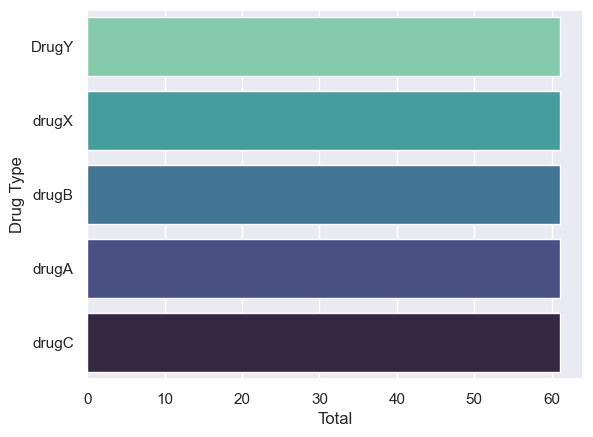

In [35]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df_drug, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

##### As can be seen, the distrubtion of drug type are now balanced.

In [36]:
from sklearn.linear_model import LogisticRegression
# solver='liblinear' specifies the algorithm to use in the optimization problem
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)
# Print the classification report, which includes precision, recall, f1-score, and support
print(classification_report(y_test, y_pred))
# Print the confusion matrix, which shows the counts of tp, tn, fp, and fn predictions
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred, y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc * 100))


              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Logistic Regression accuracy is: 85.00%


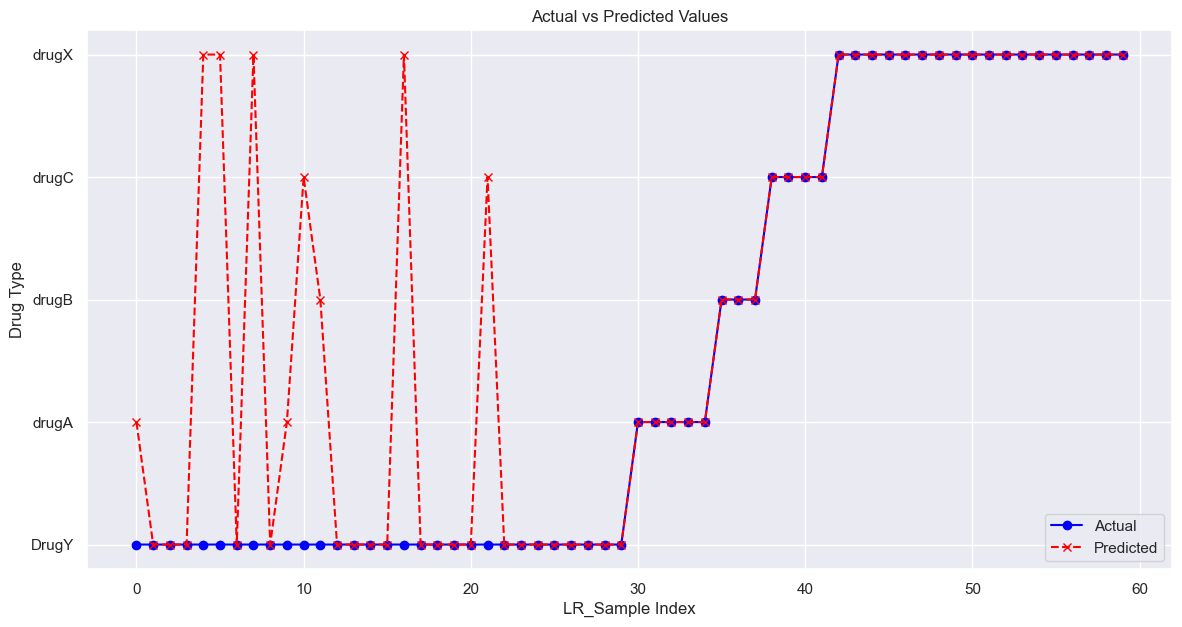

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Sort the DataFrame by actual values for better visualization
results = results.sort_values(by='Actual').reset_index(drop=True)

# Plot the actual and predicted values
plt.figure(figsize=(14, 7))
plt.plot(results['Actual'], label='Actual', color='blue', marker='o')
plt.plot(results['Predicted'], label='Predicted', color='red', linestyle='dashed', marker='x')
plt.xlabel('LR_Sample Index')
plt.ylabel('Drug Type')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


              precision    recall  f1-score   support

       DrugY       0.87      0.67      0.75        30
       drugA       0.50      0.80      0.62         5
       drugB       0.50      0.33      0.40         3
       drugC       0.57      1.00      0.73         4
       drugX       0.80      0.89      0.84        18

    accuracy                           0.75        60
   macro avg       0.65      0.74      0.67        60
weighted avg       0.78      0.75      0.75        60

[[20  3  0  3  4]
 [ 0  4  1  0  0]
 [ 1  1  1  0  0]
 [ 0  0  0  4  0]
 [ 2  0  0  0 16]]
K Neighbours accuracy is: 75.00%


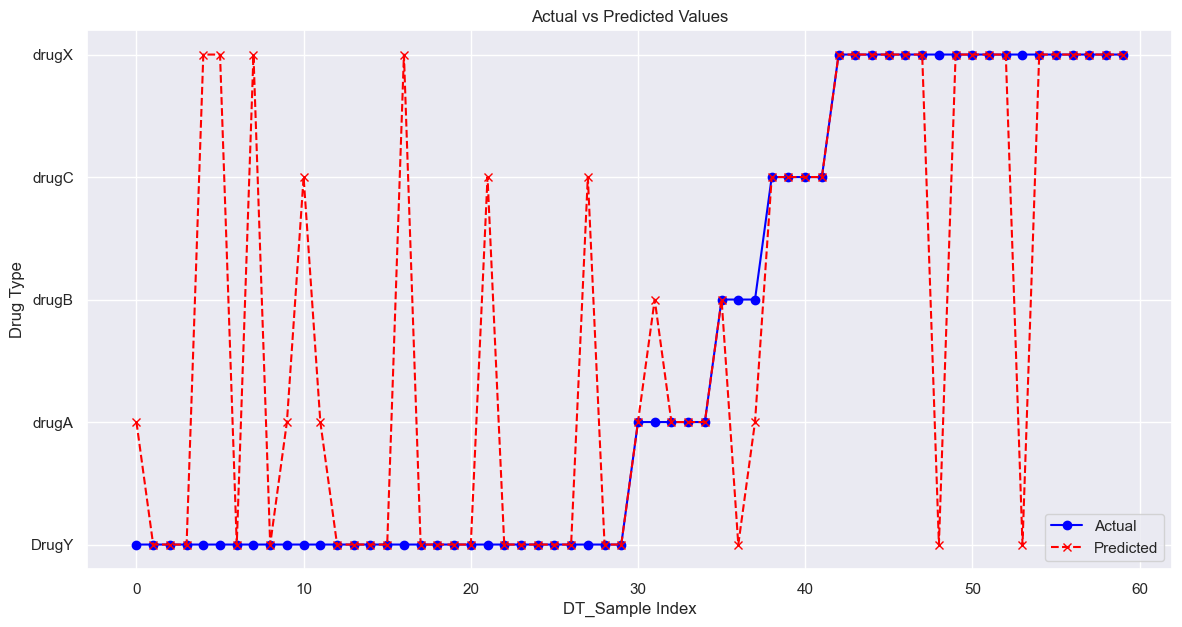

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Sort the DataFrame by actual values for better visualization
results = results.sort_values(by='Actual').reset_index(drop=True)

# Plot the actual and predicted values
plt.figure(figsize=(14, 7))
plt.plot(results['Actual'], label='Actual', color='blue', marker='o')
plt.plot(results['Predicted'], label='Predicted', color='red', linestyle='dashed', marker='x')
plt.xlabel('DT_Sample Index')
plt.ylabel('Drug Type')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

              precision    recall  f1-score   support

       DrugY       1.00      0.67      0.80        30
       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.83        60
   macro avg       0.77      0.93      0.83        60
weighted avg       0.88      0.83      0.83        60

[[20  3  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Random Forest accuracy is: 83.33%


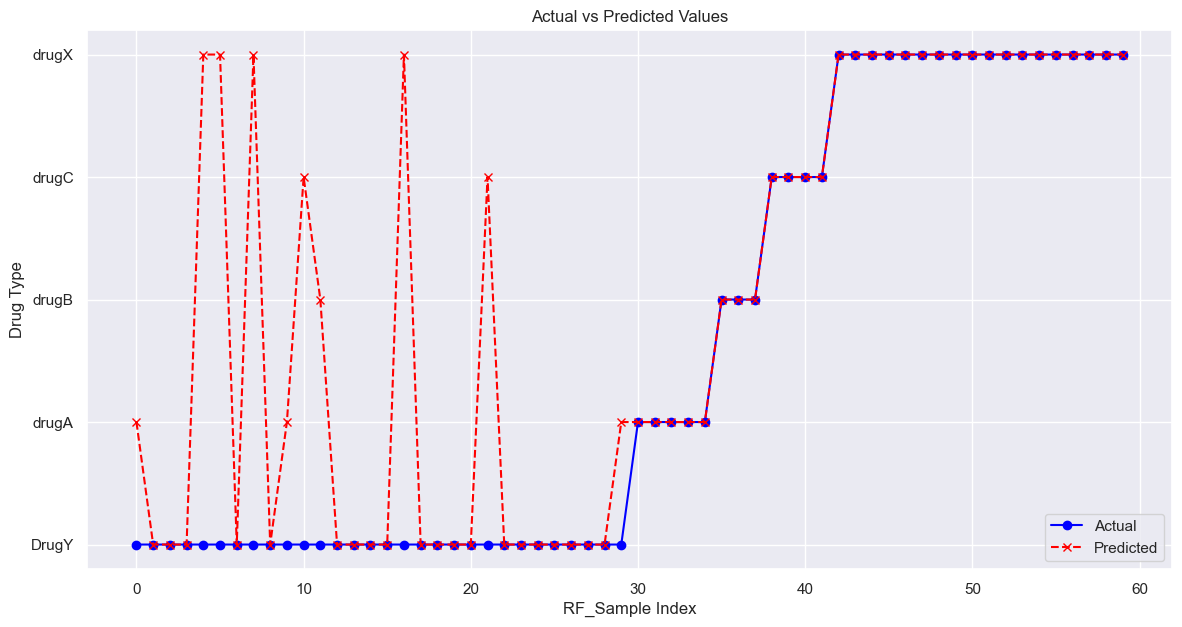

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Sort the DataFrame by actual values for better visualization
results = results.sort_values(by='Actual').reset_index(drop=True)

# Plot the actual and predicted values
plt.figure(figsize=(14, 7))
plt.plot(results['Actual'], label='Actual', color='blue', marker='o')
plt.plot(results['Predicted'], label='Predicted', color='red', linestyle='dashed', marker='x')
plt.xlabel('RF_Sample Index')
plt.ylabel('Drug Type')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [47]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

       DrugY       0.87      0.67      0.75        30
       drugA       0.50      0.80      0.62         5
       drugB       0.50      0.33      0.40         3
       drugC       0.57      1.00      0.73         4
       drugX       0.80      0.89      0.84        18

    accuracy                           0.75        60
   macro avg       0.65      0.74      0.67        60
weighted avg       0.78      0.75      0.75        60

[[20  3  0  3  4]
 [ 0  4  1  0  0]
 [ 1  1  1  0  0]
 [ 0  0  0  4  0]
 [ 2  0  0  0 16]]
K Neighbours accuracy is: 75.00%


In [46]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
SVC accuracy is: 85.00%


In [44]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.60      0.75        30
       drugA       0.50      1.00      0.67         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.80        60
   macro avg       0.75      0.92      0.79        60
weighted avg       0.87      0.80      0.80        60

[[18  5  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Decision Tree accuracy is: 80.00%


In [43]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.67      0.80        30
       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.83        60
   macro avg       0.77      0.93      0.83        60
weighted avg       0.88      0.83      0.83        60

[[20  3  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Random Forest accuracy is: 83.33%


In [49]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Decision Tree', 'Random Forest'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, DTAcc*100, RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,85.000000
2,SVM,85.000000
4,Random Forest,83.333333
3,Decision Tree,80.000000
1,K Neighbors,75.000000


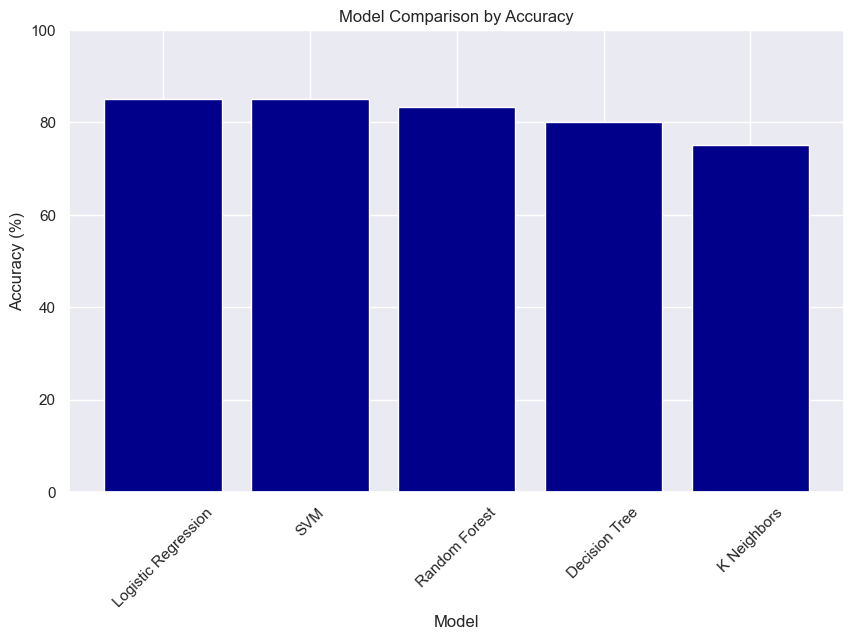

In [53]:
# Create the DataFrame with model names and their accuracies
compare = pd.DataFrame({
    'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Decision Tree', 'Random Forest'], 
    'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, DTAcc*100, RFAcc*100]
})

# Sort the DataFrame by accuracy in descending order
compare = compare.sort_values(by='Accuracy', ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(compare['Model'], compare['Accuracy'], color='darkblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison by Accuracy')
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()
